<a href="https://colab.research.google.com/github/manasvigarg03/isl_connect/blob/main/AUDIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install opencv-python ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 976.9/976.9 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 94.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [ ]:
import cv2
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO("yolov9c.pt")

In [ ]:
# read the image
image = cv2.imread("/content/Screenshot 2025-04-01 011456.png")
result_img, _ = predict_and_detect(model, image, classes=[], conf=0.5)


0: 544x640 7 persons, 1 bicycle, 1 motorcycle, 162.1ms
Speed: 4.5ms preprocess, 162.1ms inference, 2.5ms postprocess per image at shape (1, 3, 544, 640)


In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
pip install gtts playsound


0: 544x640 6 persons, 1 bicycle, 46.3ms
Speed: 4.1ms preprocess, 46.3ms inference, 1.3ms postprocess per image at shape (1, 3, 544, 640)
Total objects detected: 7
Audio message: Detected: person at 3.9 meters, person at 8.9 meters, person at 8.9 meters, person at 7.4 meters, person at 9.6 meters, person at 19.2 meters


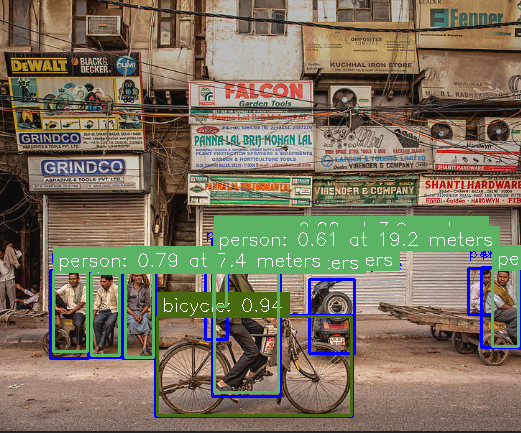

In [ ]:
import cv2
import numpy as np
from gtts import gTTS
import os
import subprocess
from IPython.display import Audio, display
import time

def predict_and_detect_with_distance(chosen_model, img, known_widths=None, focal_length=None,
                                   classes=[], conf=0.5, rectangle_thickness=2,
                                   text_thickness=1, audio_feedback=True):
    """
    Enhanced version with robust audio handling
    """
    result_img = img.copy()
    np.random.seed(42)
    colors = {i: tuple(map(int, np.random.randint(0, 255, 3))) for i in range(80)}

    results = predict(chosen_model, img, classes, conf=conf)
    result = results[0]

    print(f"Total objects detected: {len(result.boxes)}")

    audio_messages = []

    for box in result.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        class_id = int(box.cls[0])
        conf_score = float(box.conf[0])
        class_name = result.names[class_id]
        object_width_pixels = x2 - x1

        distance_text = ""
        if known_widths and focal_length and class_name in known_widths:
            distance = (known_widths[class_name] * focal_length) / object_width_pixels
            distance_text = f" at {distance:.1f} meters"
            audio_messages.append(f"{class_name}{distance_text}")

        color = colors[class_id]
        cv2.rectangle(result_img, (x1, y1), (x2, y2), color, rectangle_thickness)

        label = f"{class_name}: {conf_score:.2f}{distance_text}"
        (label_width, label_height), _ = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.6, text_thickness)

        cv2.rectangle(result_img, (x1, y1 - label_height - 10), (x1 + label_width + 10, y1), color, -1)
        cv2.putText(result_img, label, (x1 + 5, y1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), text_thickness)

    # Robust audio handling
    if audio_feedback and audio_messages:
        full_message = "Detected: " + ", ".join(audio_messages) if len(audio_messages) > 1 else f"Detected {audio_messages[0]}"
        print(f"Audio message: {full_message}")

        try:
            # Method 1: Use IPython.display for Colab
            tts = gTTS(text=full_message, lang='en')
            audio_file = "detection.mp3"
            tts.save(audio_file)

            # Try IPython audio playback first
            try:
                display(Audio(audio_file, autoplay=True))
                time.sleep(1)  # Give it time to play
            except:
                # Fallback to system playback
                try:
                    subprocess.run(["ffplay", "-nodisp", "-autoexit", audio_file], check=True)
                except:
                    # Final fallback - just print the message
                    print(f"Could not play audio. Message was: {full_message}")

            os.remove(audio_file)

        except Exception as e:
            print(f"Audio generation failed: {str(e)}")
            print(f"Message was: {full_message}")

    return result_img, results

# Example usage
known_widths = {
    "person": 0.5,
    "car": 1.8,
    "chair": 0.5,
    "dog": 0.3
}

focal_length = 500  # Adjust based on your camera calibration

annotated_img, results = predict_and_detect_with_distance(
    model,
    image.copy(),
    known_widths=known_widths,
    focal_length=focal_length,
    audio_feedback=True
)

cv2_imshow(annotated_img)